In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
import sklearn
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/heart_2020_cleaned.csv')

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


<AxesSubplot:>

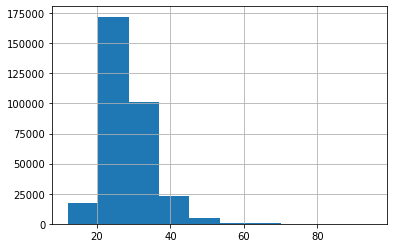

In [4]:
data['BMI'].hist()

<AxesSubplot:>

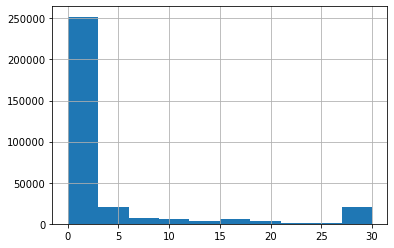

In [5]:
data['PhysicalHealth'].hist()

<AxesSubplot:>

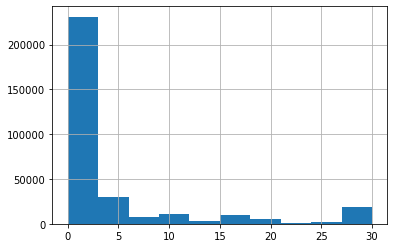

In [6]:
data['MentalHealth'].hist()

<AxesSubplot:>

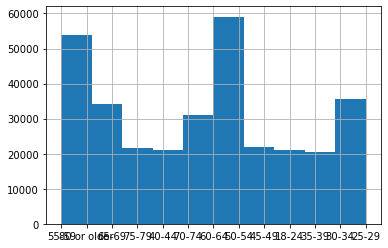

In [7]:
data['AgeCategory'].hist()

<AxesSubplot:>

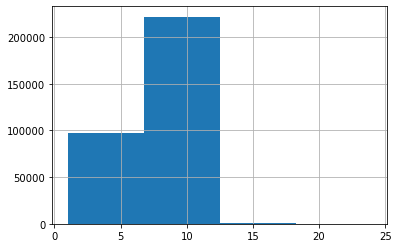

In [8]:
data['SleepTime'].hist(bins=4)

<AxesSubplot:xlabel='MentalHealth', ylabel='PhysicalHealth'>

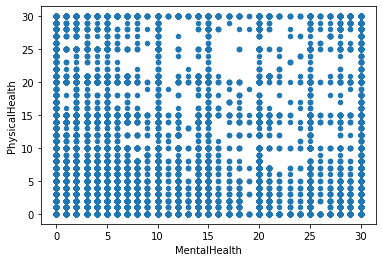

In [9]:
data.plot.scatter(x = "MentalHealth" , y = "PhysicalHealth")

In [10]:
import plotly.express as px

In [11]:
has_HD = data[data['HeartDisease'] == "Yes"]

In [12]:
has_HD

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No


In [13]:
px.pie(has_HD, "Smoking")

In [14]:
no_HD = data[data['HeartDisease'] == "No"]

In [15]:
px.pie(no_HD, "Smoking")

In [16]:
data['HeartDisease'] = data['HeartDisease'].map({'Yes':1, "No":0})

In [17]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [18]:
data['Smoking'] = data['Smoking'].map({'yes':1, "No":0})

In [19]:
data['AlcoholDrinking'] = data['AlcoholDrinking'].map({'yes':1, "No":0})

In [20]:
data['Stroke'] = data['Stroke'].map({'yes':1, "No":0})

In [21]:
data['DiffWalking'] = data['DiffWalking'].map({'yes':1, "No":0})

In [22]:
data['Sex'] = data['Sex'].map({'Male':1, "Female":0})

In [23]:
data['Diabetic'] = data['Diabetic'].map({'yes':1, "No":0})

In [24]:
data['PhysicalActivity'] = data['PhysicalActivity'].map({'yes':1, "No":0})

In [25]:
data['Asthma'] = data['Asthma'].map({'yes':1, "No":0})

In [26]:
data['KidneyDisease'] = data['KidneyDisease'].map({'yes':1, "No":0})

In [27]:
data['SkinCancer'] = data['SkinCancer'].map({'yes':1, "No":0})

In [28]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [29]:
dummies = pd.get_dummies(data["Race"])
dummies.head()

,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [30]:
y = data['HeartDisease']

In [31]:
x = data.loc[:, data.columns != "HeartDisease"]

In [32]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, x, test_size=0.2)

In [33]:
x_train.shape

(255836, 18)

In [34]:
print(y_train)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
219527  27.67      NaN              0.0     0.0             0.0           0.0   
282892  28.80      0.0              0.0     0.0             0.0           0.0   
303150  35.67      0.0              0.0     0.0            15.0          28.0   
275632  18.88      0.0              NaN     0.0             1.0          10.0   
5916    26.92      NaN              0.0     0.0             0.0           0.0   
...       ...      ...              ...     ...             ...           ...   
181205  30.41      NaN              0.0     0.0            10.0           5.0   
295122  19.20      NaN              0.0     0.0             0.0          15.0   
192307  19.80      0.0              0.0     0.0             0.0           0.0   
137593  45.73      0.0              0.0     0.0            30.0          30.0   
151878  34.11      0.0              0.0     0.0             7.0           7.0   

        DiffWalking  Sex Ag